**Take the table from Mysql**

In [ ]:
import mysql.connector
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# Connection details
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='',
    database='phonepe_db'
)

# Query to fetch the data
query = "SELECT * FROM Agg_Trans"

# Load the data into a DataFrame
Agg_Trans_df = pd.read_sql(query, conn)
conn.close()

# Display the DataFrame
#print(Agg_Trans_df.head())

***==============================ANALYSIS=============================***

**Analysis 1:Scenario-Decoding Transaction Dynamics on PhonePe**

**Top Performing States by Total_Transaction_amount**

In [ ]:
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='',
    database='phonepe_db'
)
query = """
SELECT State,Year, SUM(Transaction_amount) AS Total_Amount
FROM Agg_Trans
GROUP BY State,Year
ORDER BY Total_Amount
;
"""
top_states_df = pd.read_sql(query, conn)
conn.close()
top_states_df.to_csv('my_data.csv',index=False)
print(top_states_df)

                 State  Year  Total_Amount
0          Lakshadweep  2018  1.691867e+07
1          Lakshadweep  2019  3.895033e+07
2          Lakshadweep  2020  8.186344e+07
3          Lakshadweep  2021  1.442276e+08
4    Andaman & Nicobar  2018  1.890761e+08
..                 ...   ...           ...
247          Karnataka  2023  1.147508e+13
248     Andhra Pradesh  2024  1.287331e+13
249          Telangana  2024  1.407568e+13
250        Maharashtra  2024  1.478439e+13
251          Karnataka  2024  1.532931e+13

[252 rows x 3 columns]


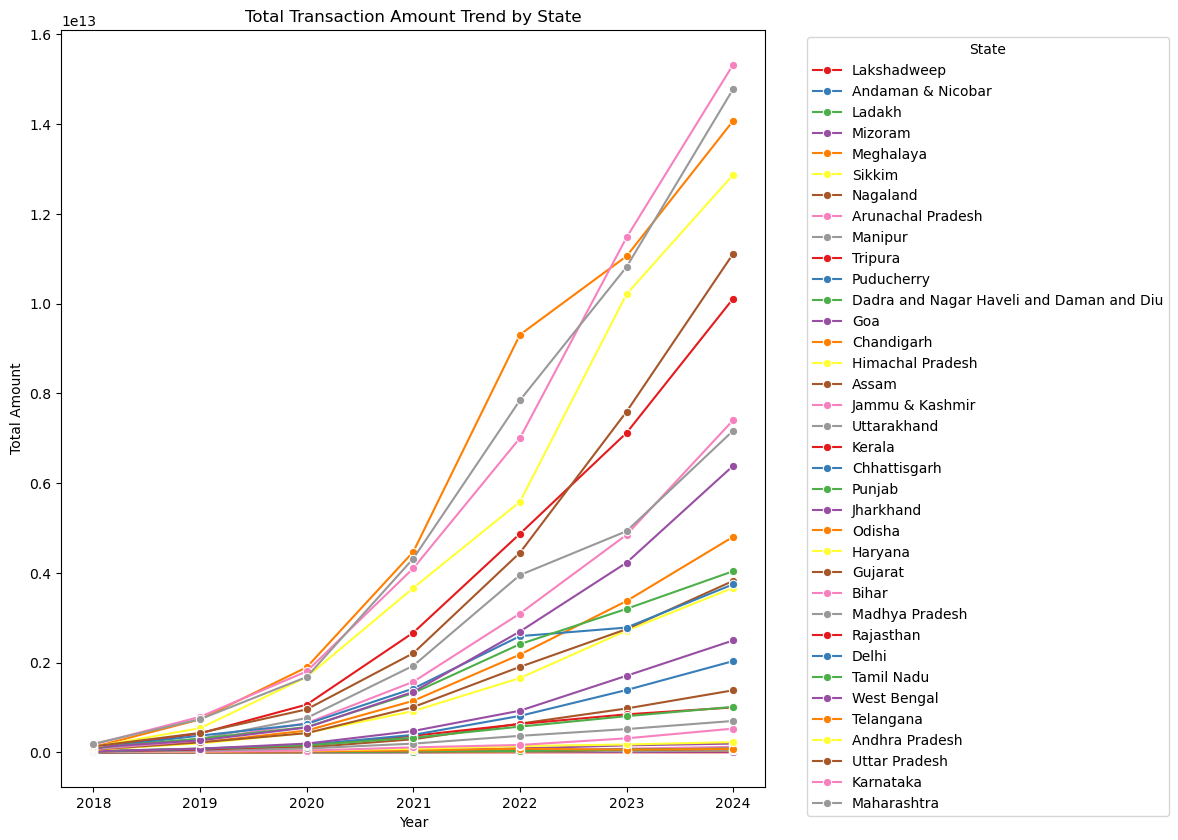

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
sns.lineplot(data=top_states_df, x="Year", y="Total_Amount", hue="State", marker="o",palette='Set1')


plt.title("Total Transaction Amount Trend by State")
plt.xlabel("Year")
plt.ylabel("Total Amount")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Quarterly Trends by State**

In [41]:
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='Ikku@123',
    database='phonepe_db'
)
query = """
SELECT State, Year, Quarter, SUM(Transaction_amount) AS Total_Amount
FROM Agg_Trans
GROUP BY State, Year, Quarter
ORDER BY State, Year, Quarter;
"""

Quarterly_by_state = pd.read_sql(query, conn)  # create the DataFrame directly
conn.close()
Quarterly_by_state.to_csv('my_data1.csv',index=False)
print(Quarterly_by_state)

                  State  Year  Quarter  Total_Amount
0     Andaman & Nicobar  2018        1  1.463176e+07
1     Andaman & Nicobar  2018        2  2.833854e+07
2     Andaman & Nicobar  2018        3  5.555747e+07
3     Andaman & Nicobar  2018        4  9.054834e+07
4     Andaman & Nicobar  2019        1  1.022997e+08
...                 ...   ...      ...           ...
1003        West Bengal  2023        4  1.249395e+12
1004        West Bengal  2024        1  1.422026e+12
1005        West Bengal  2024        2  1.547344e+12
1006        West Bengal  2024        3  1.607644e+12
1007        West Bengal  2024        4  1.810100e+12

[1008 rows x 4 columns]


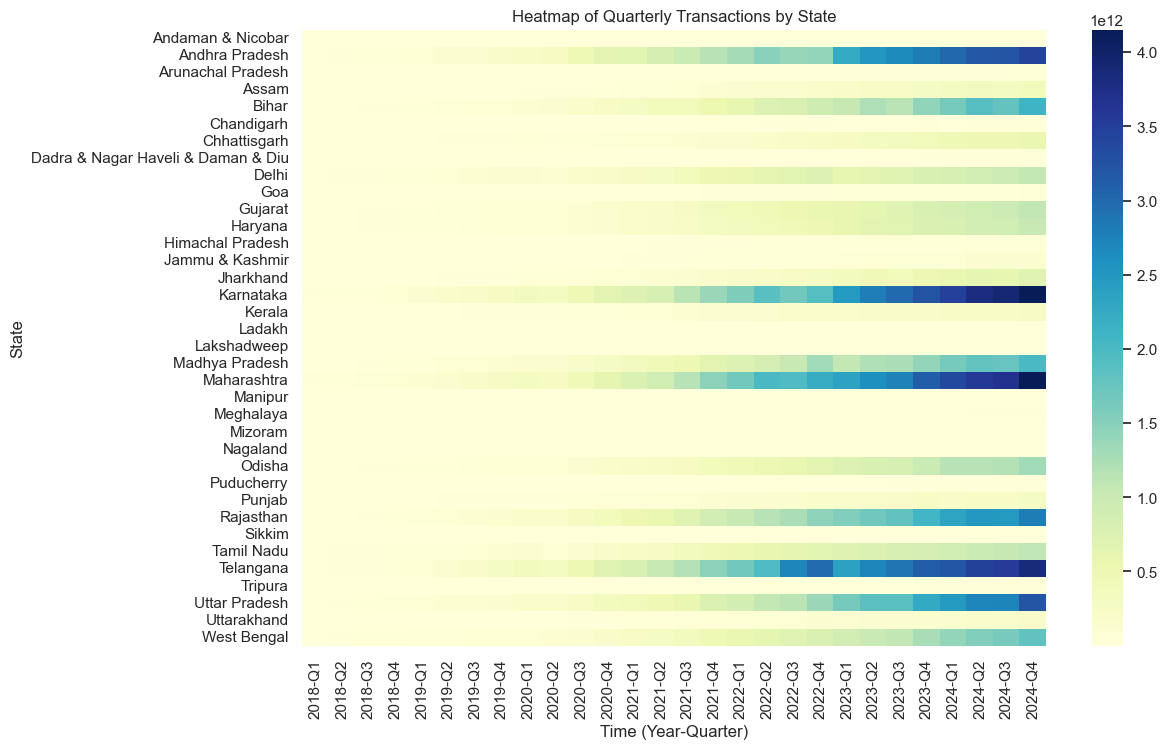

In [109]:
import seaborn as sns

pivot_df = Quarterly_by_state.pivot(index='State', columns='Time', values='Total_Amount').fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot_df, cmap='YlGnBu')
plt.title('Heatmap of Quarterly Transactions by State')
plt.xlabel('Time (Year-Quarter)')
plt.ylabel('State')
plt.show()

**Payment Category Trends**

In [ ]:
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='',
    database='phonepe_db'
)
query="""
SELECT Year,Transaction_type, SUM(Transaction_count) AS Total_Count, SUM(Transaction_amount) AS Total_Amount
FROM Agg_Trans
GROUP BY Transaction_type,Year
ORDER BY Total_Amount DESC;
"""
Payment_category_df=pd.read_sql(query,conn)
conn.close()
Payment_category_df.to_csv('my_data2',index=False)
print(Payment_category_df)

    Year          Transaction_type   Total_Count  Total_Amount
0   2024     Peer-to-peer payments  3.320052e+10  9.674287e+13
1   2023     Peer-to-peer payments  2.274056e+10  7.252372e+13
2   2022     Peer-to-peer payments  1.499731e+10  5.004589e+13
3   2024         Merchant payments  6.040066e+10  2.797723e+13
4   2021     Peer-to-peer payments  8.123978e+09  2.796713e+13
5   2023         Merchant payments  3.671175e+10  1.813033e+13
6   2020     Peer-to-peer payments  3.491324e+09  1.232602e+13
7   2022         Merchant payments  2.069781e+10  1.194508e+13
8   2019     Peer-to-peer payments  1.954957e+09  5.488757e+12
9   2021         Merchant payments  8.436879e+09  5.270794e+12
10  2024  Recharge & bill payments  5.611489e+09  4.810106e+12
11  2023  Recharge & bill payments  4.744133e+09  3.779887e+12
12  2022  Recharge & bill payments  3.542626e+09  2.227461e+12
13  2020         Merchant payments  2.729138e+09  1.548367e+12
14  2018     Peer-to-peer payments  5.237962e+08  1.432

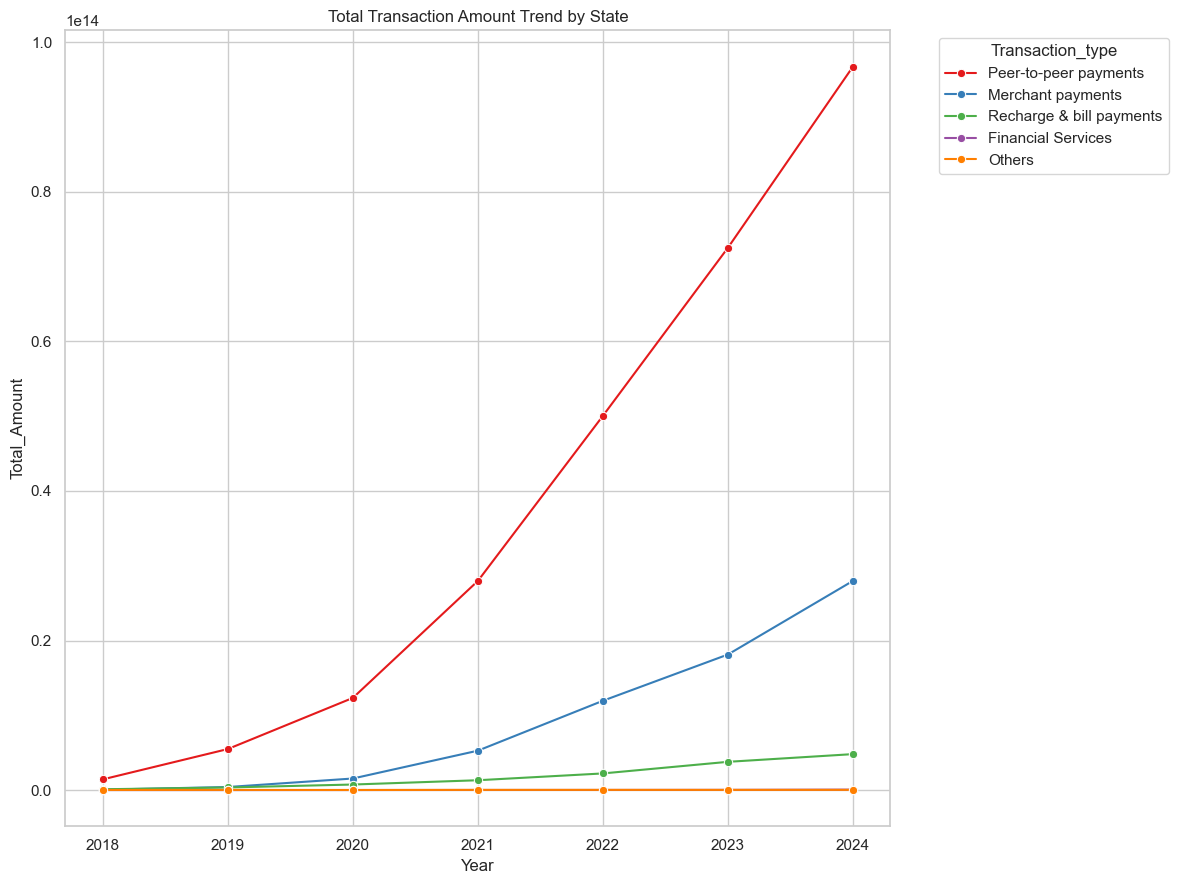

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
sns.lineplot(data=Payment_category_df, x="Year", y="Total_Amount", hue="Transaction_type", marker="o",palette='Set1')


plt.title("Total Transaction Amount Trend by Transaction_type")
plt.xlabel("Year")
plt.ylabel("Total_Amount")
plt.legend(title="Transaction_type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Growth Rate Year over Year (YoY) for Each State**

In [45]:
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='Ikku@123',
    database='phonepe_db'
)

query="""
SELECT 
    a.State,
    a.Year,
    a.Total_Amount,
    ROUND(
        (a.Total_Amount - b.Total_Amount) / NULLIF(b.Total_Amount, 0) * 100, 
        2
    ) AS YoY_Growth_Percentage
FROM (
    SELECT State, Year, SUM(Transaction_amount) AS Total_Amount
    FROM Agg_Trans
    GROUP BY State, Year
) a
LEFT JOIN (
    SELECT State, Year, SUM(Transaction_amount) AS Total_Amount
    FROM Agg_Trans
    GROUP BY State, Year
) b
ON a.State = b.State AND a.Year = b.Year + 1
ORDER BY a.State, a.Year;
"""
Growth_rate_overstate=pd.read_sql(query,conn)
conn.close()
Growth_rate_overstate.to_csv('my_data3',index=False)
print(Growth_rate_overstate)

                 State  Year  Total_Amount  YoY_Growth_Percentage
0    Andaman & Nicobar  2018  1.890761e+08                    NaN
1    Andaman & Nicobar  2019  4.734648e+08                 150.41
2    Andaman & Nicobar  2020  1.296423e+09                 173.82
3    Andaman & Nicobar  2021  4.925488e+09                 279.93
4    Andaman & Nicobar  2022  1.211026e+10                 145.87
..                 ...   ...           ...                    ...
247        West Bengal  2020  5.527316e+11                 107.78
248        West Bengal  2021  1.347047e+12                 143.71
249        West Bengal  2022  2.692527e+12                  99.88
250        West Bengal  2023  4.227142e+12                  57.00
251        West Bengal  2024  6.387113e+12                  51.10

[252 rows x 4 columns]


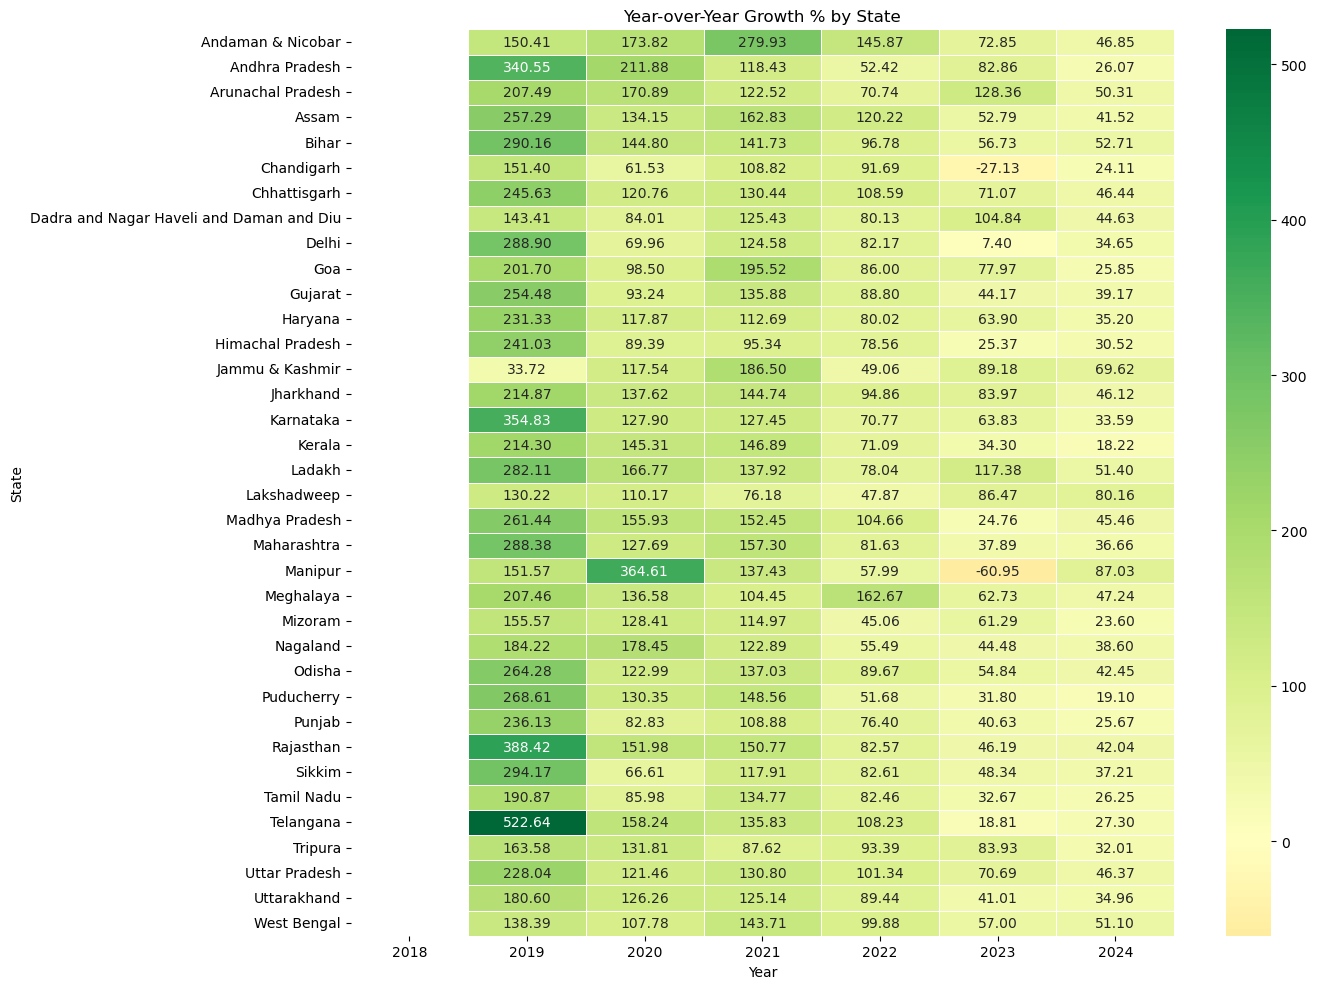

In [47]:


# Pivot to make a matrix suitable for a heatmap
pivot_df = Growth_rate_overstate.pivot(index="State", columns="Year", values="YoY_Growth_Percentage")

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="RdYlGn", center=0, linewidths=0.5)
plt.title("Year-over-Year Growth % by State")
plt.xlabel("Year")
plt.ylabel("State")
plt.tight_layout()
plt.show()

========================================================**ANALYSIS 2**================================


**Device Dominance and User Engagement Analysis**


**Take Agg_User and Map_User tables from Mysql**

In [ ]:
import mysql.connector
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# Connection details
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='',
    database='phonepe_db'
)

# Query to fetch the data
query1 = "SELECT * FROM Agg_User"
query2= "SELECT * FROM Map_User"

# Load the data into a DataFrame
Agg_User = pd.read_sql(query1, conn)
Map_User=pd.read_sql(query2,conn)

# Optional: Close the connection
conn.close()




**Total users and app opens per state**

In [51]:
#Group the Map_User data by State, Year, and Quarter and sum
State_App_Data = Map_User.groupby(['State', 'Year', 'Quarter']).agg({
    'Registered_user': 'sum',
    'Appopen_count': 'sum'
}).reset_index()
#This will give total registered users and app opens for each state in each quarter.


**Total users per device brand and state**

In [53]:
Brand_User_Data = Agg_User.groupby(['State', 'Year', 'Quarter', 'Brand']).agg({
    'Count': 'sum',
   
}).reset_index()
#This will give the idea of how many people use each brand in each state and time.


**Combine brand and state-level engagement**

In [55]:
#merge both DataFrames on State, Year, Quarter

Merged = pd.merge(Brand_User_Data, State_App_Data, on=['State', 'Year', 'Quarter'], how='left')

#Here we can compare How many users use a brand,How many users registered in total,How many app opens happened


**Calculate engagement rate for each brand**

In [57]:
Merged['Brand_Engagement (%)'] = (Merged['Count'] / Merged['Registered_user']) * 100

#This shows how much each device brand contributes to total users.

Merged['AppOpens_per_User'] = Merged['Appopen_count'] / Merged['Registered_user']
Merged.to_csv('my_data4',index=False)


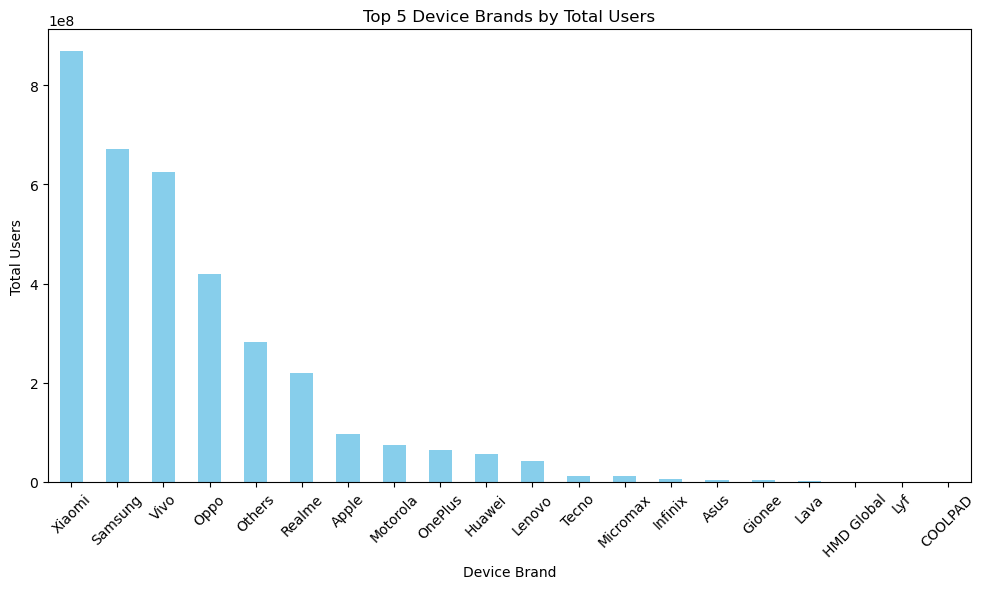

In [59]:
import matplotlib.pyplot as plt
top_brands = Merged.groupby('Brand')['Count'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
top_brands.plot(kind='bar', color='skyblue')
plt.title('Top 5 Device Brands by Total Users')
plt.xlabel('Device Brand')
plt.ylabel('Total Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

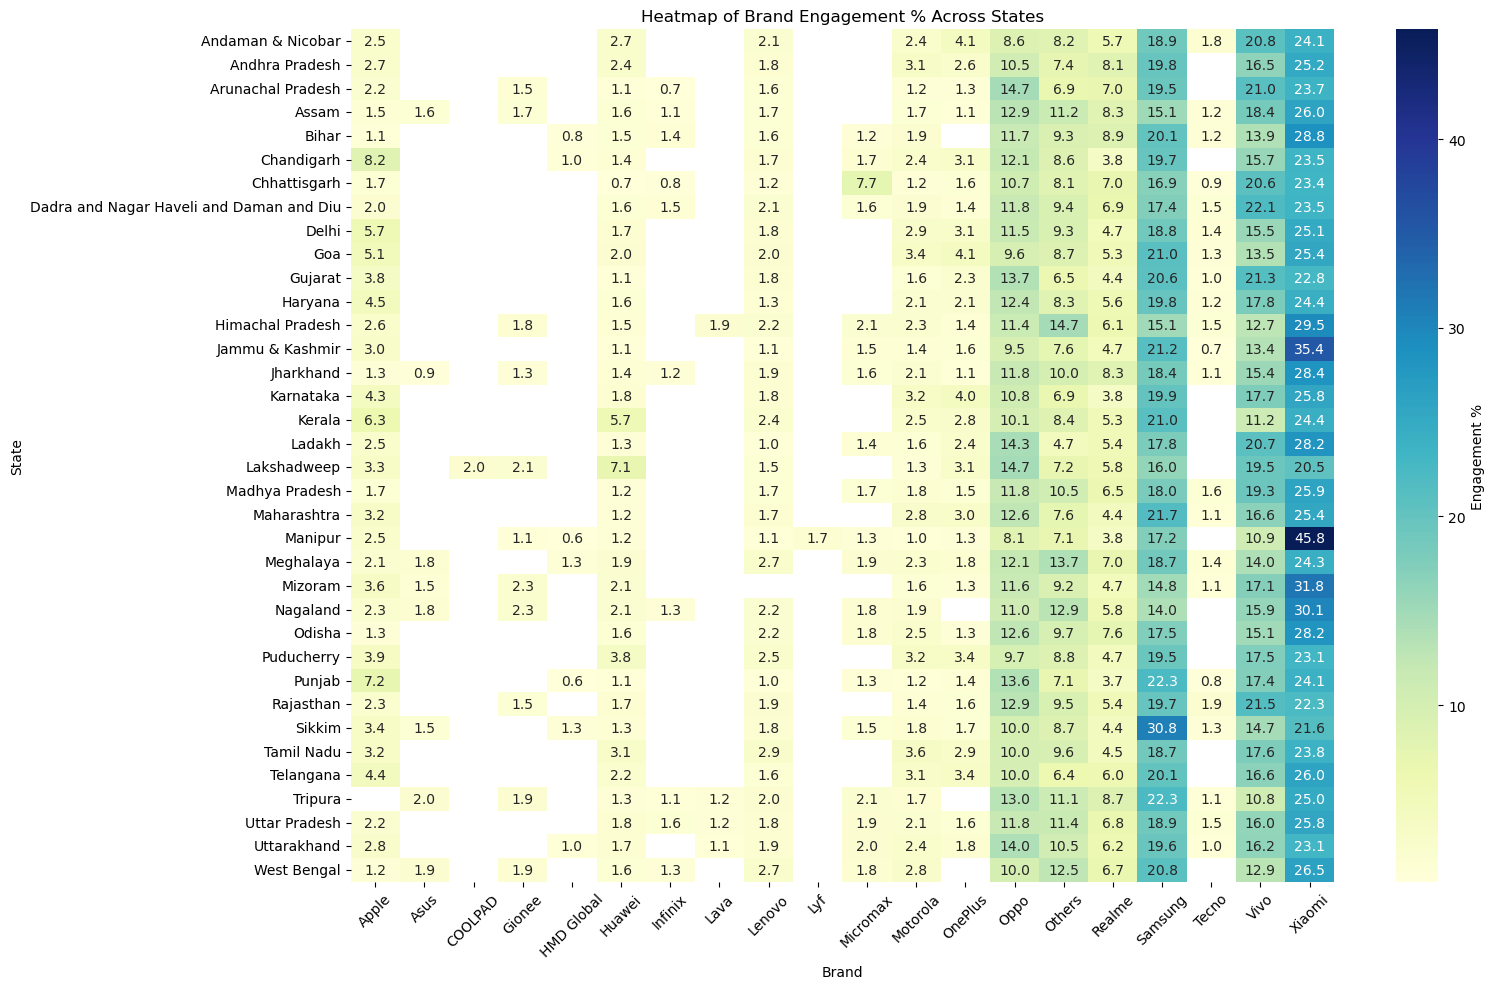

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and average engagement % by State and Brand
engagement = Merged.groupby(['State', 'Brand'])['Brand_Engagement (%)'].mean().reset_index()

# Create pivot table for heatmap
heatmap_data = engagement.pivot(index='State', columns='Brand', values='Brand_Engagement (%)')
plt.figure(figsize=(16,10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Engagement %'})

plt.title('Heatmap of Brand Engagement % Across States')
plt.xlabel('Brand')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

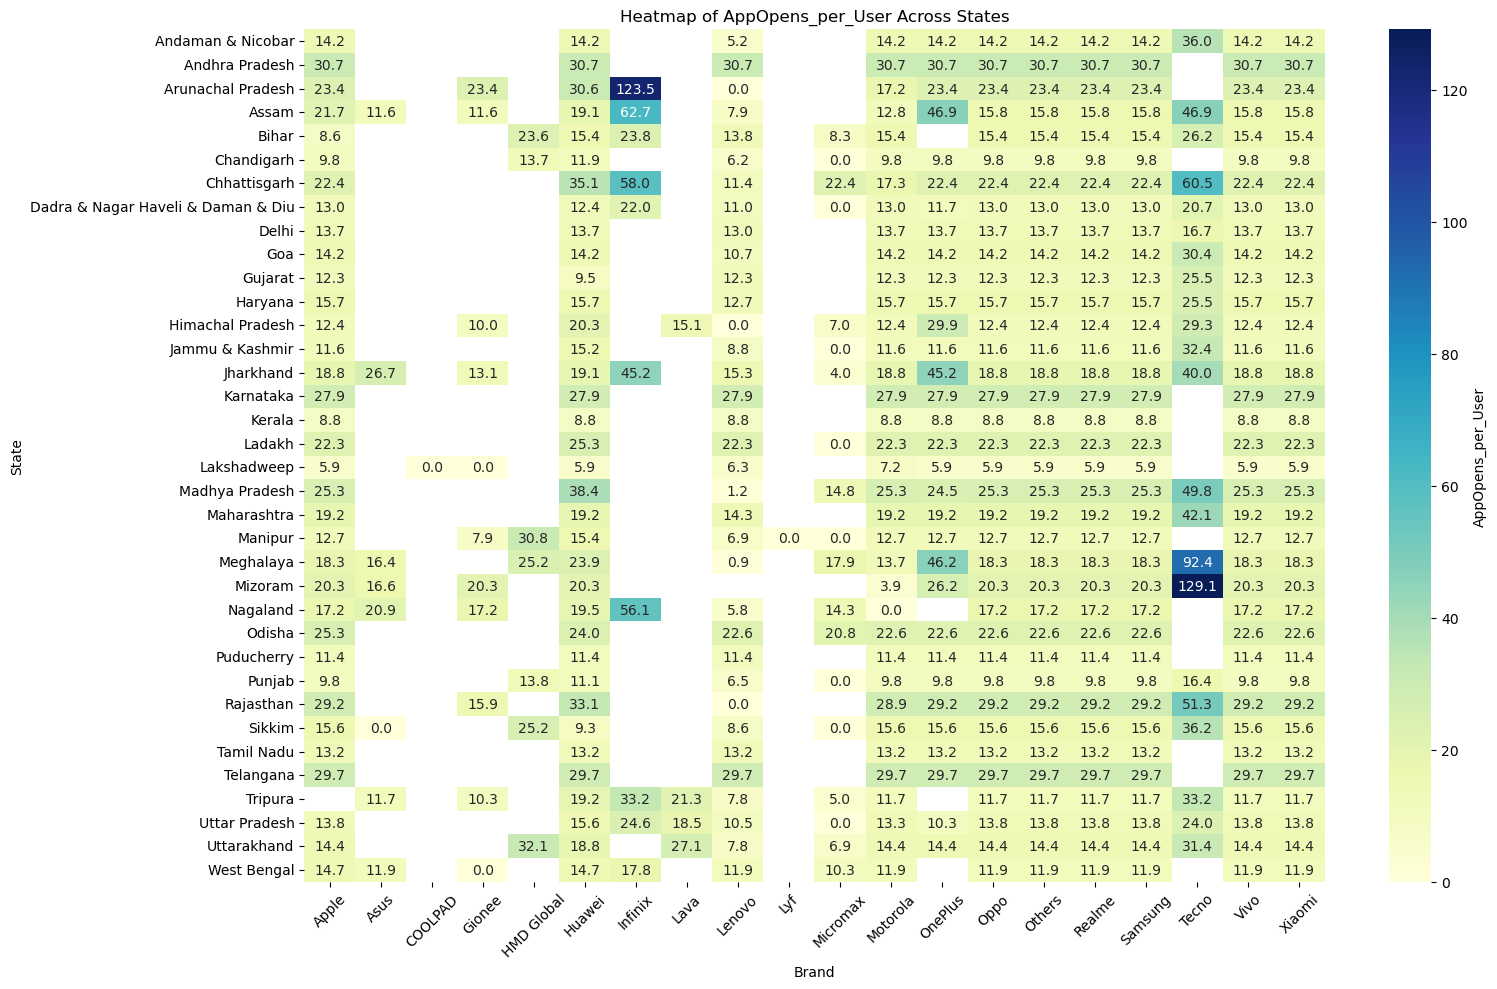

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and average engagement % by State and Brand
engagement = Merged.groupby(['State', 'Brand'])['AppOpens_per_User'].mean().reset_index()

# Create pivot table for heatmap
heatmap_data = engagement.pivot(index='State', columns='Brand', values='AppOpens_per_User')
plt.figure(figsize=(16,10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'AppOpens_per_User'})

plt.title('Heatmap of AppOpens_per_User Across States')
plt.xlabel('Brand')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**===========================Analysis 3=============================**

**Insurance Penetration and Growth Potential**

**Take the table from mysql**

In [ ]:
import mysql.connector
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='',
    database='phonepe_db'
)
query1 = "SELECT * FROM Agg_Insurance"
Agg_Insurance = pd.read_sql(query1, conn)
conn.close()





**Total Insurance Transaction by States**

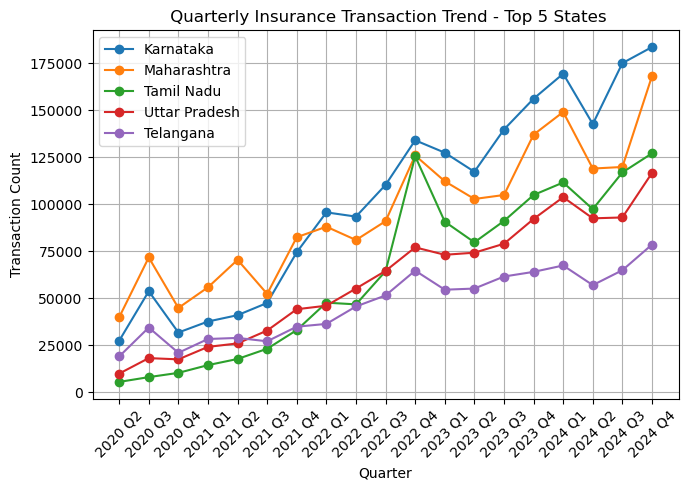

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

Agg_Insurance.to_csv('my_data6',index=False)
state_summary = Agg_Insurance.groupby('State')[['Transaction_count', 'Transaction_amount']].sum().sort_values(by='Transaction_count', ascending=False)
#print(" Top 10 States by Insurance Transaction Count:\n")
#print(state_summary.head(10))

#print("\n Bottom 10 States by Insurance Transaction Count:\n")
#print(state_summary.tail(10))

#  Quarterly Growth Trend for Top 5 States 
top_states = state_summary.head(5).index.tolist()

plt.figure(figsize=(7, 5))
for state in top_states:
    df = Agg_Insurance[Agg_Insurance['State'] == state]
    df_grouped = df.groupby(['Year', 'Quarter'])['Transaction_count'].sum().reset_index()
    df_grouped['Time'] = df_grouped['Year'].astype(str) + ' Q' + df_grouped['Quarter'].astype(str)
    plt.plot(df_grouped['Time'], df_grouped['Transaction_count'], label=state, marker='o')

plt.title(" Quarterly Insurance Transaction Trend - Top 5 States")
plt.xlabel("Quarter")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Fast-Growing States (Growth Potential)**

In [69]:

# Growth = % change in transactions between earliest and latest quarter for each state

growth_data = []

for state in Agg_Insurance['State'].unique():
    df = Agg_Insurance[Agg_Insurance['State'] == state]
    df_grouped = df.groupby(['Year', 'Quarter'])['Transaction_count'].sum().reset_index()
    df_grouped = df_grouped.sort_values(by=['Year', 'Quarter'])

    if len(df_grouped) >= 2:
        start = df_grouped.iloc[0]['Transaction_count']
        end = df_grouped.iloc[-1]['Transaction_count']
        growth = ((end - start) / start * 100) if start > 0 else None
        growth_data.append((state, start, end, growth))

growth_df = pd.DataFrame(growth_data, columns=['State', 'Start_Count', 'End_Count', 'Growth_Percent'])
growth_df = growth_df.dropna().sort_values(by='Growth_Percent', ascending=False)

print("\n Top 10 Fastest Growing States in Insurance Transactions (% Growth):\n")
print(growth_df.head(10))

print("\n Slowest or Declining States in Insurance Transactions:\n")
print(growth_df.tail(10))


🚀 Top 10 Fastest Growing States in Insurance Transactions (% Growth):

                State  Start_Count  End_Count  Growth_Percent
0   Andaman & Nicobar            6       1293    21450.000000
16             Kerala         1588      89533     5538.098237
13    Jammu & Kashmir          206       8893     4216.990291
18        Lakshadweep            4        159     3875.000000
22          Meghalaya           41       1313     3102.439024
32            Tripura           88       2794     3075.000000
17             Ladakh           14        429     2964.285714
29             Sikkim           21        599     2752.380952
26         Puducherry          112       2838     2433.928571
30         Tamil Nadu         5473     127002     2220.518911

🐢 Slowest or Declining States in Insurance Transactions:

                                       State  Start_Count  End_Count  \
11                                   Haryana         6321      58808   
10                                   Gujara

**Top 10 Fastest Growing States (% Growth)**

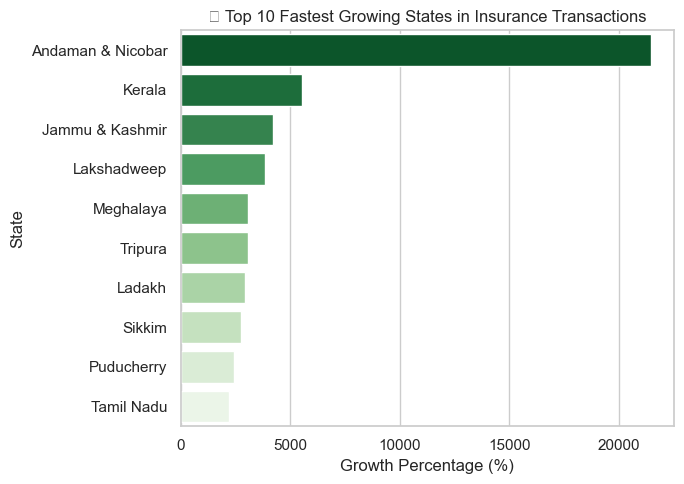

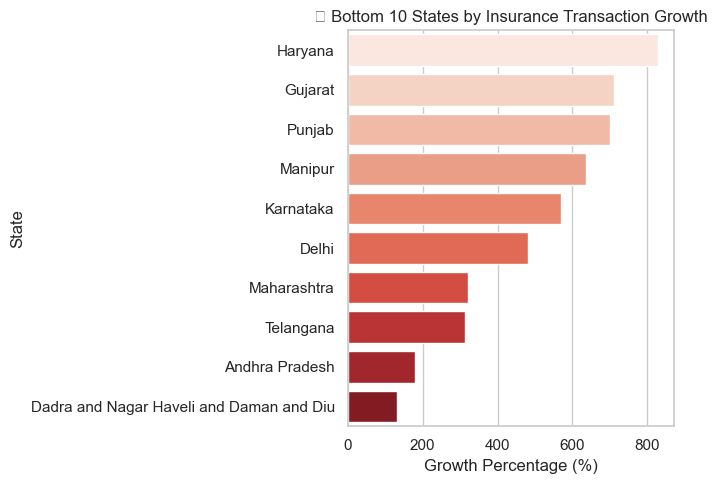

In [71]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot Top 10 Growing States
top10_growth = growth_df.head(10)

plt.figure(figsize=(7, 5))
sns.barplot(x='Growth_Percent', y='State', data=top10_growth, palette='Greens_r')
plt.title(" Top 10 Fastest Growing States in Insurance Transactions")
plt.xlabel("Growth Percentage (%)")
plt.ylabel("State")
plt.tight_layout()
plt.show()
# Bar Chart: Bottom 10 States (Slowest or Declining)
bottom10_growth = growth_df.tail(10)

plt.figure(figsize=(7,5))
sns.barplot(x='Growth_Percent', y='State', data=bottom10_growth, palette='Reds')
plt.title(" Bottom 10 States by Insurance Transaction Growth")
plt.xlabel("Growth Percentage (%)")
plt.ylabel("State")
plt.tight_layout()
plt.show()


**======================================Analysis 4===========================**

**Transaction Analysis for Market Expansion**

In [ ]:
import mysql.connector
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='',
    database='phonepe_db'
)
query1 = "SELECT * FROM Map_Trans"
Map_Trans = pd.read_sql(query1, conn)
conn.close()





**Total Transaction Amount by States**

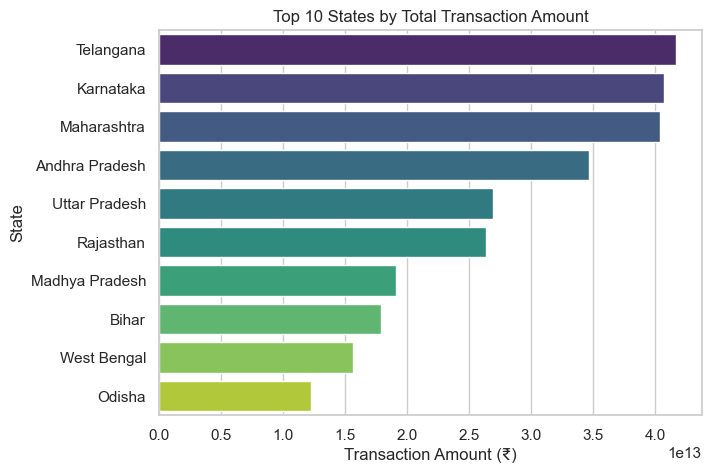

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#step 1. Summary stats by State ----
Map_Trans.to_csv('my_data7',index=False)
state_summary = Map_Trans.groupby('State').agg({
    'Transaction_count': 'sum',
    'Transaction_amount': 'sum'
}).reset_index()

state_summary = state_summary.sort_values(by='Transaction_amount', ascending=False)

# Plot: Top 10 states by Transaction Amount
plt.figure(figsize=(7,5))
sns.barplot(data=state_summary.head(10), x='Transaction_amount', y='State', palette='viridis')
plt.title('Top 10 States by Total Transaction Amount')
plt.xlabel('Transaction Amount (₹)')
plt.ylabel('State')
plt.show()


**Quarterly trends for a selected state**

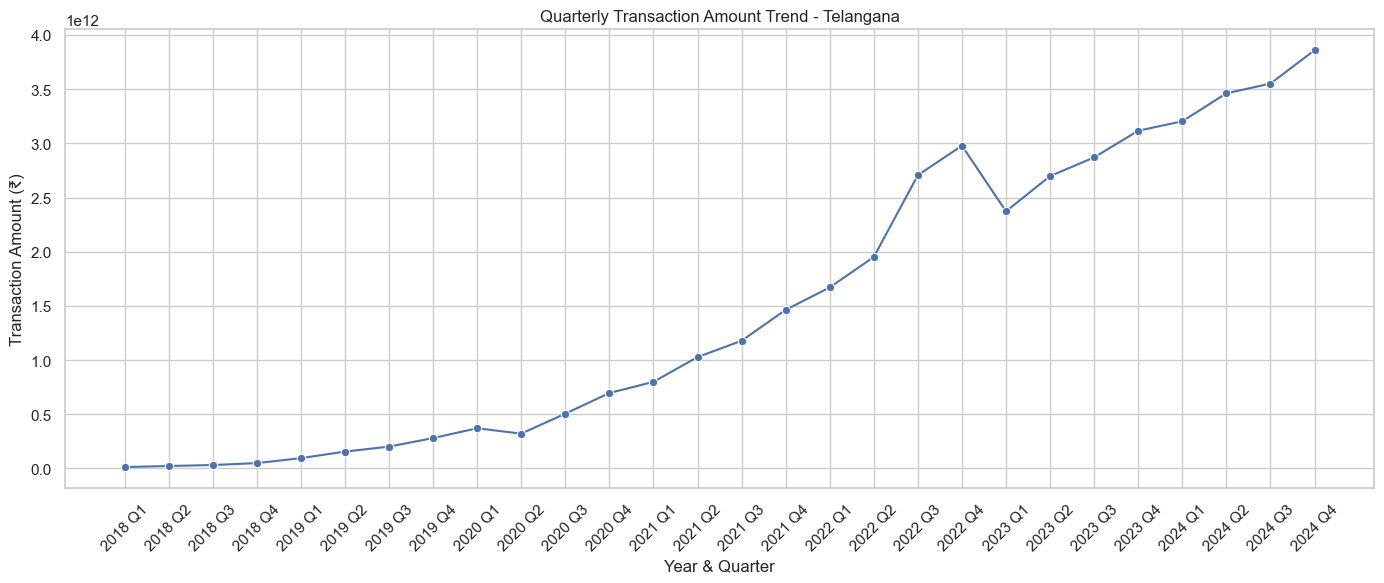

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns


quarterly_trends = Map_Trans.groupby(['State', 'Year', 'Quarter']).agg({
    'Transaction_count': 'sum',
    'Transaction_amount': 'sum'
}).reset_index()

quarterly_trends = quarterly_trends.sort_values(by=['State', 'Year', 'Quarter'])
# Choose a state to plot
state_name = 'Telangana'

state_trend = quarterly_trends[quarterly_trends['State'] == state_name]

# Create a time column for plotting (Year-Q)
state_trend['Year_Quarter'] = state_trend['Year'].astype(str) + ' Q' + state_trend['Quarter'].astype(str)

plt.figure(figsize=(14,6))
sns.lineplot(data=state_trend, x='Year_Quarter', y='Transaction_amount', marker='o')
plt.xticks(rotation=45)
plt.title(f'Quarterly Transaction Amount Trend - {state_name}')
plt.xlabel('Year & Quarter')
plt.ylabel('Transaction Amount (₹)')
plt.tight_layout()
plt.show()


**Year-over-Year growth**

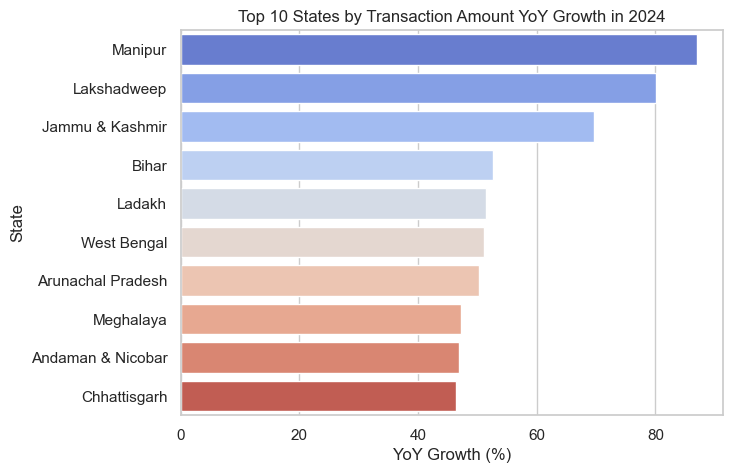

In [81]:

annual_summary = Map_Trans.groupby(['State', 'Year']).agg({
    'Transaction_count': 'sum',
    'Transaction_amount': 'sum'
}).reset_index()

annual_summary = annual_summary.sort_values(by=['State', 'Year'])

annual_summary['Transaction_amount_YoY_growth'] = annual_summary.groupby('State')['Transaction_amount'].pct_change() * 100

# Latest year growth
latest_year = annual_summary['Year'].max()
growth_latest_year = annual_summary[annual_summary['Year'] == latest_year]
growth_latest_year = growth_latest_year.sort_values(by='Transaction_amount_YoY_growth', ascending=False)

# Plot: Top 10 states by YoY growth in latest year
plt.figure(figsize=(7,5))
sns.barplot(data=growth_latest_year.head(10), x='Transaction_amount_YoY_growth', y='State', palette='coolwarm')
plt.title(f'Top 10 States by Transaction Amount YoY Growth in {latest_year}')
plt.xlabel('YoY Growth (%)')
plt.ylabel('State')
plt.show()

**Identify potential states (low current amount but high growth)**

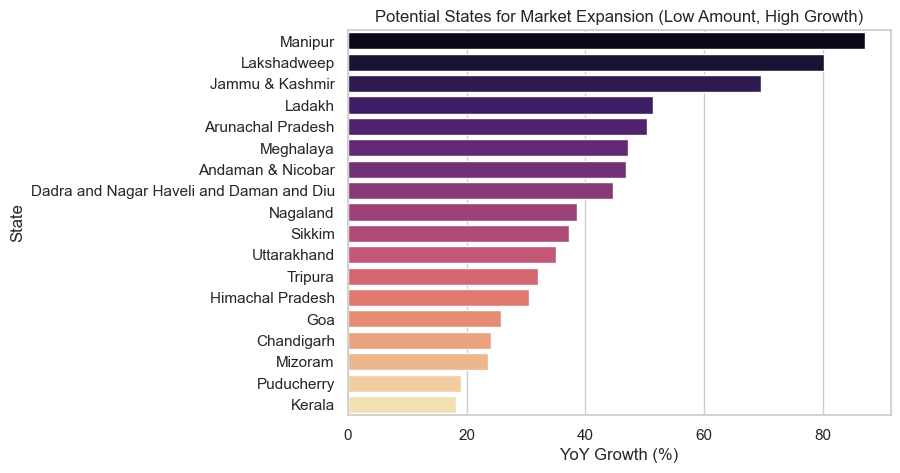

In [83]:

median_amount = growth_latest_year['Transaction_amount'].median()

potential_states = growth_latest_year[
    (growth_latest_year['Transaction_amount'] < median_amount) &
    (growth_latest_year['Transaction_amount_YoY_growth'] > 10)
]

#print("Potential States for Market Expansion:")
#print(potential_states[['State', 'Transaction_amount', 'Transaction_amount_YoY_growth']])

# Plot potential states
plt.figure(figsize=(7,5))
sns.barplot(data=potential_states, x='Transaction_amount_YoY_growth', y='State', palette='magma')
plt.title('Potential States for Market Expansion (Low Amount, High Growth)')
plt.xlabel('YoY Growth (%)')
plt.ylabel('State')
plt.show()


**==================================ANALYSIS 5===============================**

**User Engagement and Growth Strategy**



In [85]:
import mysql.connector
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# Connection details
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='Ikku@123',
    database='phonepe_db'
)
query = "SELECT * FROM Map_User"
Map_User=pd.read_sql(query,conn)
conn.close()
Map_User.to_csv('mydata8',index=False)




**State-wise Summary: Total Registered Users & App Opens**

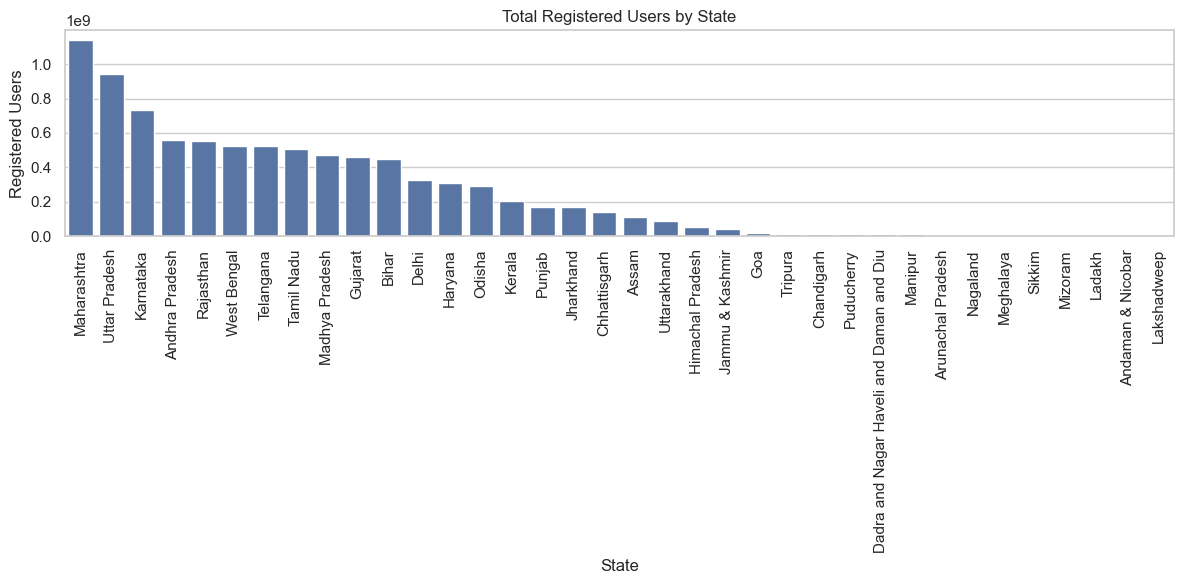

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
state_summary = Map_User.groupby('State')[['Registered_user', 'Appopen_count']].sum().sort_values(by='Registered_user', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=state_summary.index, y=state_summary['Registered_user'])
plt.xticks(rotation=90)
plt.title('Total Registered Users by State')
plt.ylabel('Registered Users')
plt.xlabel('State')
plt.tight_layout()
plt.show()


**User Growth Over Time for Top 5 States**

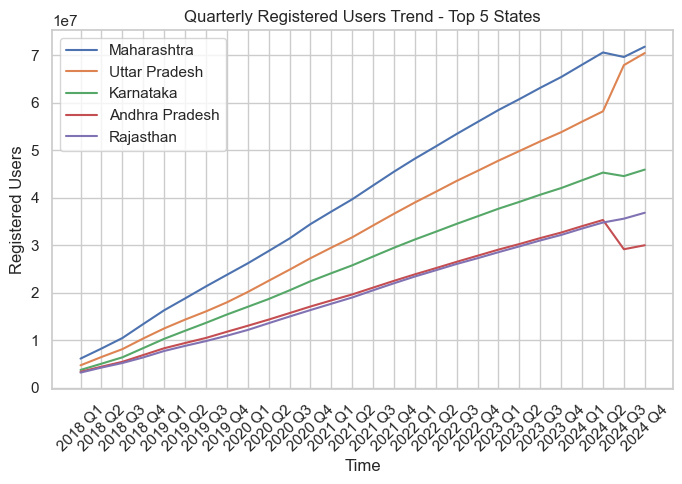

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
top_states = state_summary.head(5).index

plt.figure(figsize=(7,5))
for state in top_states:
    df = Map_User[Map_User['State'] == state].groupby(['Year', 'Quarter'])[['Registered_user']].sum().reset_index()
    df['Time'] = df['Year'].astype(str) + ' Q' + df['Quarter'].astype(str)
    plt.plot(df['Time'], df['Registered_user'], label=state)

plt.title('Quarterly Registered Users Trend - Top 5 States')
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Registered Users')
plt.legend()
plt.tight_layout()
plt.show()

**Engagement Ratio by State (App Opens / Registered Users)**



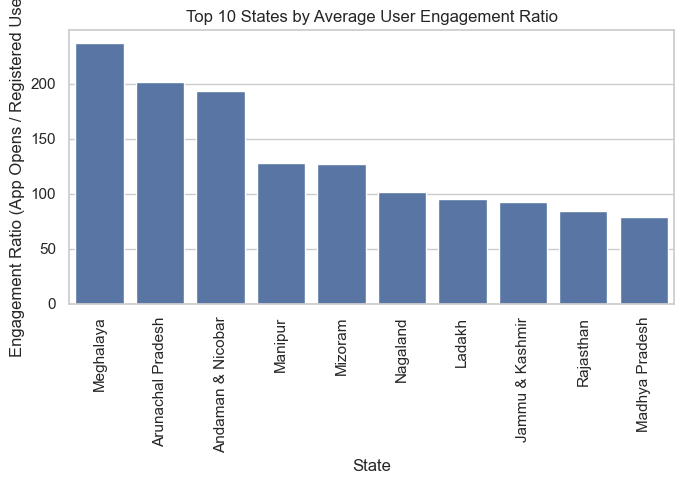

In [93]:
Map_User['Engagement_Ratio'] = Map_User['Appopen_count'] / Map_User['Registered_user']
Map_User.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Map_User.dropna(subset=['Engagement_Ratio'], inplace=True)

engagement_ratio = Map_User.groupby('State')['Engagement_Ratio'].mean().sort_values(ascending=False)

# Top 10 states by engagement ratio
plt.figure(figsize=(7,5))
sns.barplot(x=engagement_ratio.head(10).index, y=engagement_ratio.head(10).values)
plt.xticks(rotation=90)
plt.title('Top 10 States by Average User Engagement Ratio')
plt.ylabel('Engagement Ratio (App Opens / Registered Users)')
plt.xlabel('State')
plt.tight_layout()
plt.show()

**District-Level Analysis: Example for Maharashtra**

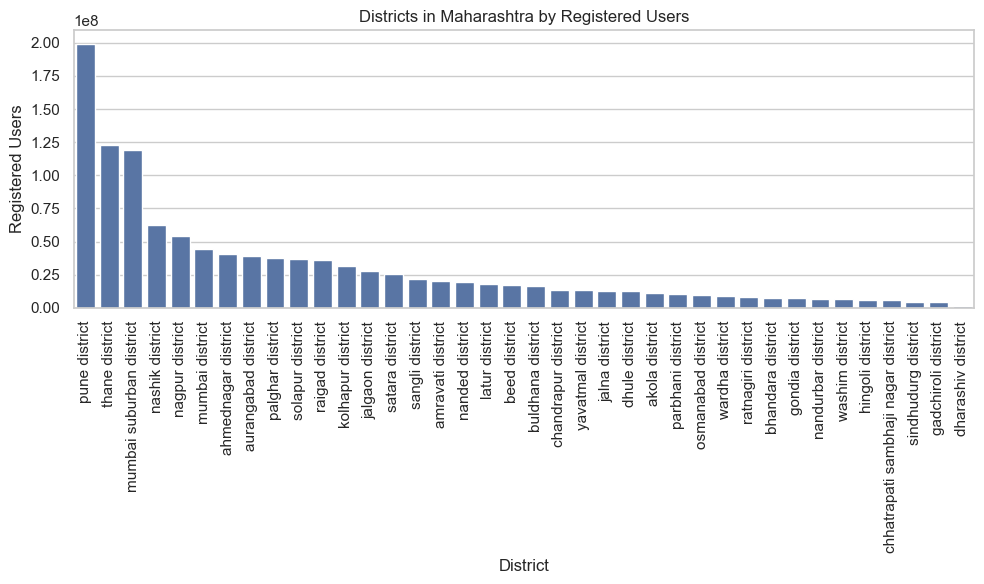

In [95]:
district_data = Map_User[Map_User['State'] == 'Maharashtra'].groupby('District')[['Registered_user', 'Appopen_count']].sum().sort_values(by='Registered_user', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=district_data.index, y=district_data['Registered_user'])
plt.xticks(rotation=90)
plt.title('Districts in Maharashtra by Registered Users')
plt.ylabel('Registered Users')
plt.xlabel('District')
plt.tight_layout()
plt.show()